In [120]:
import pandas as pd

In [121]:
placements = pd.read_csv('Placement_Data_Full_Class.csv')

In [122]:
#first Look at the data 
placements.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [123]:
#checking the dataset information
placements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [124]:
#checking the null values in the dataset
placements.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [125]:
placement = placements.drop(['salary'], axis=1)

In [126]:
placement.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [127]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [128]:
#label Encoding 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
placement["gender"]=le.fit_transform(placement["gender"])
placement["ssc_b"]=le.fit_transform(placement["ssc_b"])
placement["hsc_b"]=le.fit_transform(placement["hsc_b"])
placement["hsc_s"]=le.fit_transform(placement["hsc_s"])
placement["degree_t"]=le.fit_transform(placement["degree_t"])
placement["workex"]=le.fit_transform(placement["workex"])
placement["specialisation"]=le.fit_transform(placement["specialisation"])
placement["status"]=le.fit_transform(placement["status"])


In [129]:
#EDA and Outlier Analysis
#five point summary 
placement.describe()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372
std,62.209324,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240
min,1.000000,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000
25%,54.500000,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000
50%,108.000000,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000
75%,161.500000,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000
max,215.000000,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000


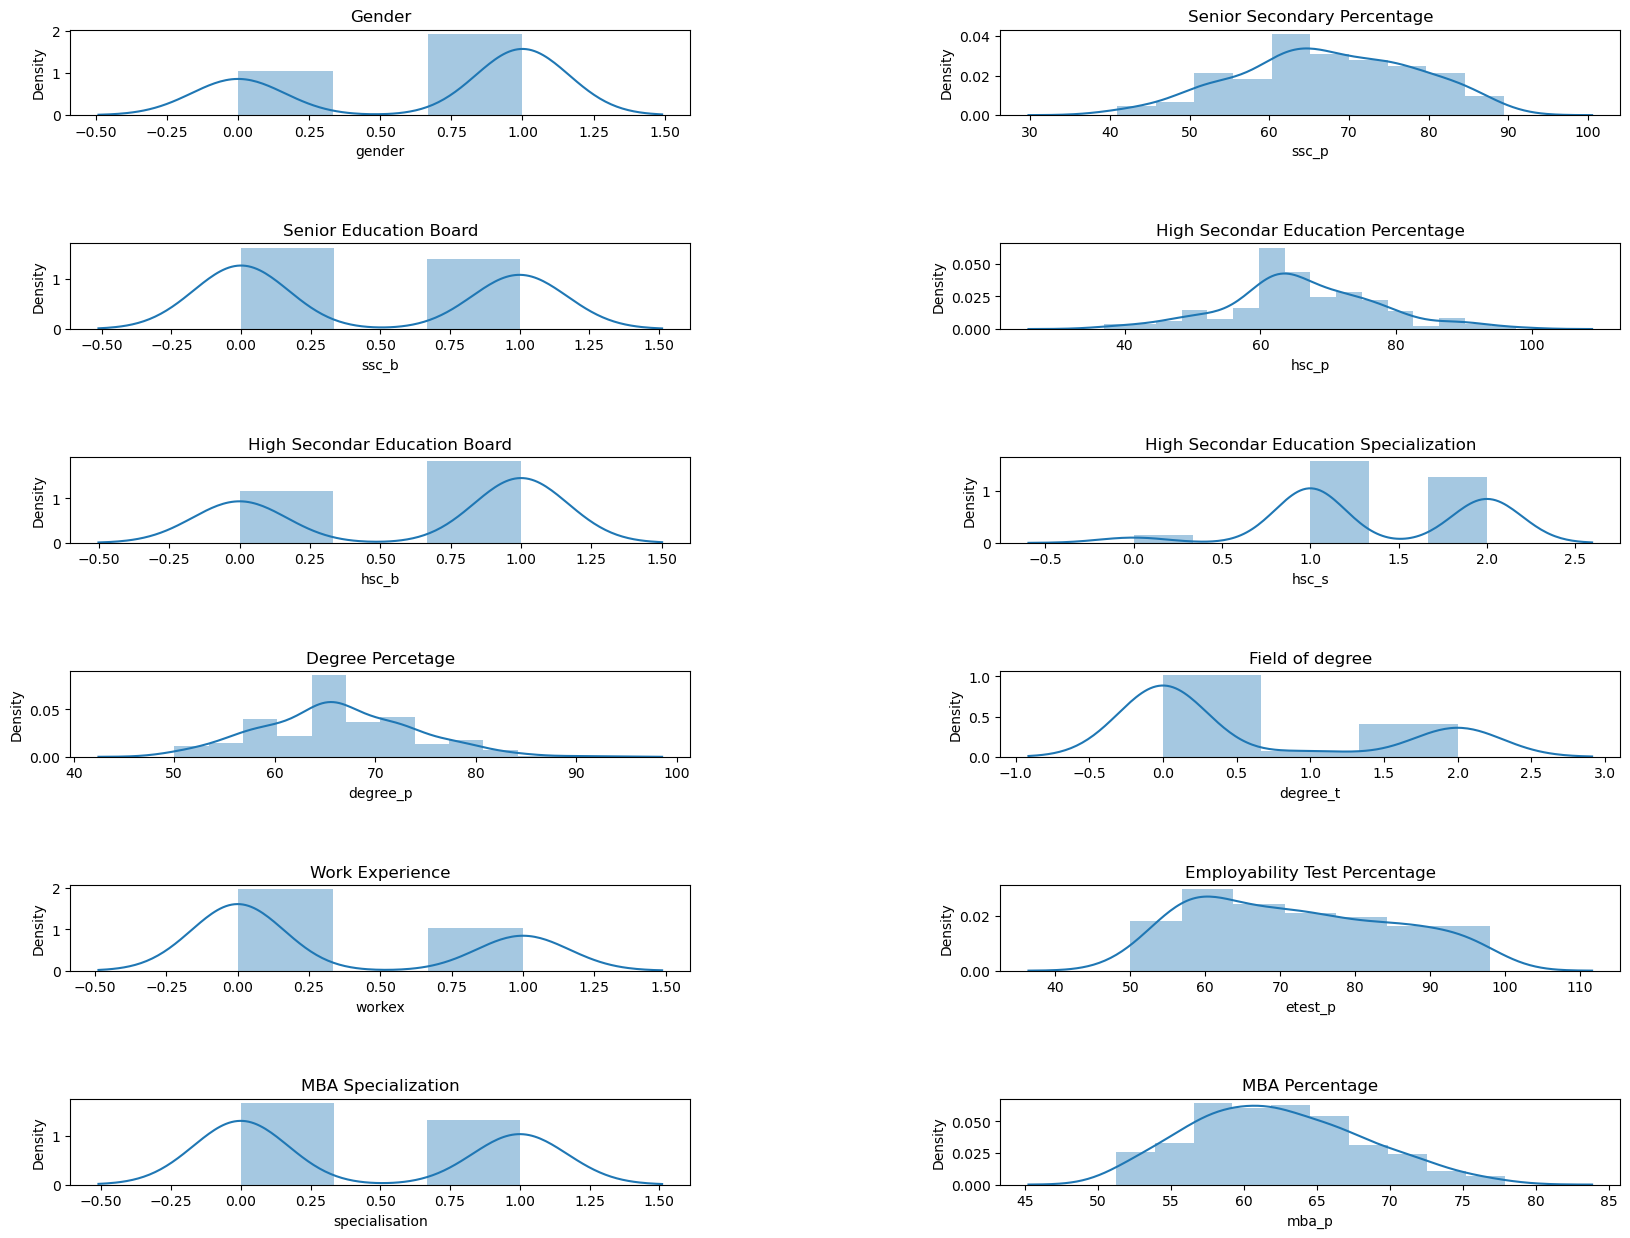

In [130]:
#frequency Distribution
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(6,2, figsize=(20,15))


plt.subplot(6,2,1)
sns.distplot(placement['gender'])
plt.title("Gender")

plt.subplot(6,2,2)
sns.distplot(placement['ssc_p'])
plt.title("Senior Secondary Percentage")

plt.subplot(6,2,3)
sns.distplot(placement['ssc_b'])
plt.title("Senior Education Board")

plt.subplot(6,2,4)
sns.distplot(placement['hsc_p'])
plt.title("High Secondar Education Percentage")

plt.subplot(6,2,5)
sns.distplot(placement['hsc_b'])
plt.title("High Secondar Education Board")

plt.subplot(6,2,6)
sns.distplot(placement['hsc_s'])
plt.title("High Secondar Education Specialization")

plt.subplot(6,2,7)
sns.distplot(placement['degree_p'])
plt.title("Degree Percetage")

plt.subplot(6,2,8)
sns.distplot(placement['degree_t'])
plt.title("Field of degree")

plt.subplot(6,2,9)
sns.distplot(placement['workex'])
plt.title("Work Experience")

plt.subplot(6,2,10)
sns.distplot(placement['etest_p'])
plt.title("Employability Test Percentage")

plt.subplot(6,2,11)
sns.distplot(placement['specialisation'])
plt.title("MBA Specialization")

plt.subplot(6,2,12)
sns.distplot(placement['mba_p'])
plt.title("MBA Percentage")

plt.subplots_adjust(hspace=1.5, wspace=0.5)

<AxesSubplot:xlabel='status', ylabel='Density'>

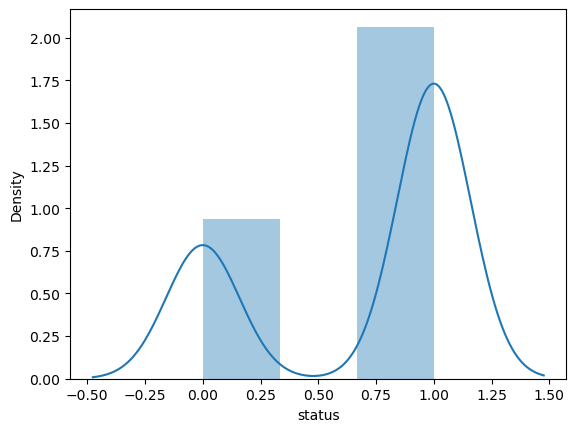

In [131]:
sns.distplot(placement['status'])

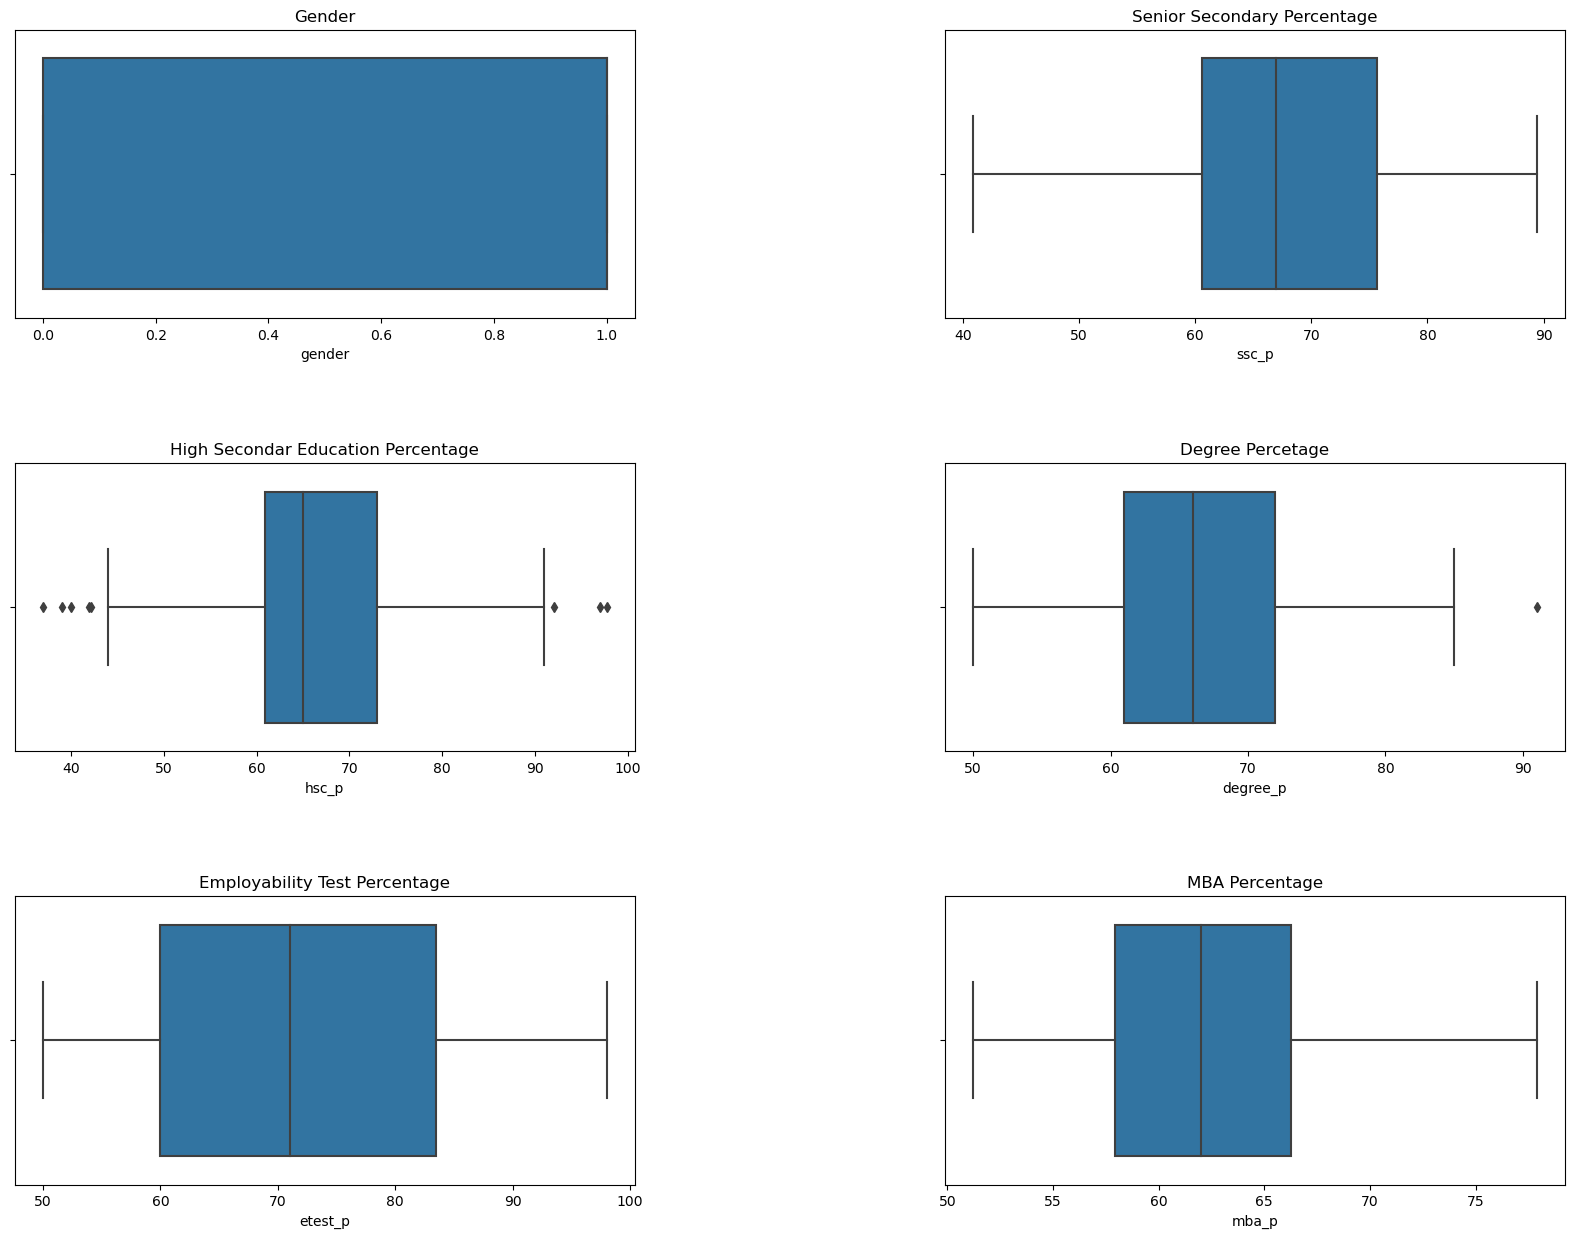

In [132]:
#outlier Analysis
fig, axes = plt.subplots(3,2, figsize=(20,15))


plt.subplot(3,2,1)
sns.boxplot(placement['gender'])
plt.title("Gender")

plt.subplot(3,2,2)
sns.boxplot(placement['ssc_p'])
plt.title("Senior Secondary Percentage")


plt.subplot(3,2,3)
sns.boxplot(placement['hsc_p'])
plt.title("High Secondar Education Percentage")


plt.subplot(3,2,4)
sns.boxplot(placement['degree_p'])
plt.title("Degree Percetage")


plt.subplot(3,2,5)
sns.boxplot(placement['etest_p'])
plt.title("Employability Test Percentage")


plt.subplot(3,2,6)
sns.boxplot(placement['mba_p'])
plt.title("MBA Percentage")

plt.subplots_adjust(hspace=0.5, wspace=0.5)

<AxesSubplot:>

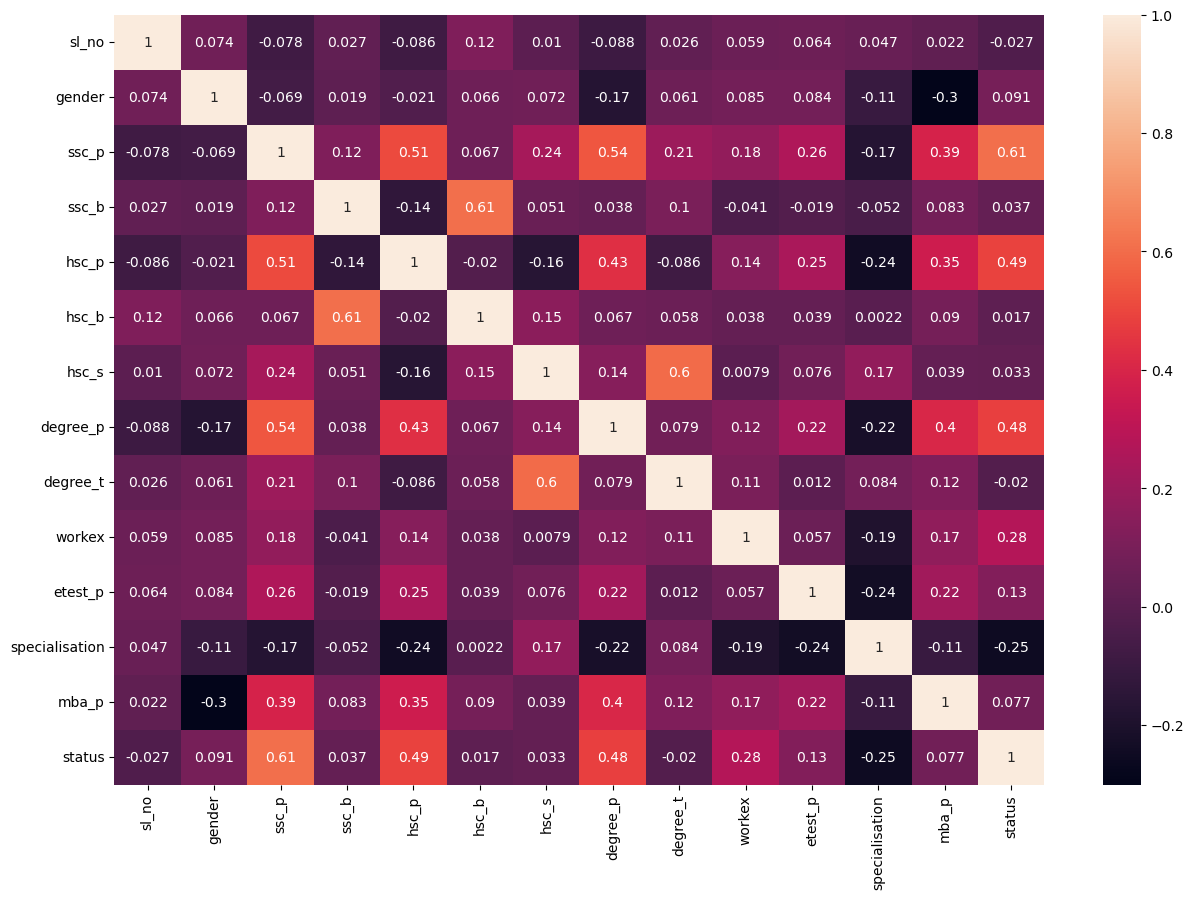

In [133]:
#Correlation
corr = placement.corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [134]:
#dependent and Independent Features - Based on the correlation coefficients
X_ = placement.drop(['status','sl_no', 'gender', 'ssc_b', 'hsc_b',
                     'hsc_s','degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'], axis=1)
y_ = placement['status']

Recursive Feature Elimination (RFE) is a feature selection technique that aims to identify the most relevant features in a dataset. It works by recursively eliminating less important features until a specified number of features or a predefined criteria is met. RFE is a powerful tool for reducing the dimensionality of a dataset and improving the performance of machine learning models.

Here's how RFE works in detail:

Select an Estimator: The first step is to choose an estimator or a model that will be used to evaluate the importance of features. This estimator can be any machine learning algorithm capable of assigning importance scores to features. In your case, you have chosen the DecisionTreeRegressor as the estimator.

Specify the Number of Features: Determine the number of features to select, which is passed to the n_features_to_select parameter of the RFE constructor. This parameter determines the desired number of features to be included in the final subset.

Initial Training: The RFE process starts by training the chosen estimator on the entire set of features in the dataset.

Feature Ranking: After the initial training, the importance or ranking of each feature is calculated. The importance scores depend on the specific algorithm used as the estimator. For example, in the case of the DecisionTreeRegressor, features are ranked based on their contribution to reducing the regression error.

Feature Elimination: The feature(s) with the lowest importance score(s) are eliminated from the dataset. The exact number of features eliminated at each iteration depends on the desired number of features to select. In your case, the algorithm will eliminate the features until only three features remain.

Recursive Iteration: The process of training the estimator, ranking features, and eliminating the least important features is repeated iteratively until the specified number of features is reached. Each iteration involves training the estimator on the reduced set of features from the previous iteration.

Final Subset of Features: Once the desired number of features is obtained, the RFE process stops, and the remaining features form the final subset. These selected features are considered the most relevant or important for the given task.

Model Training: Finally, the selected subset of features can be used to train a model for prediction or further analysis. By focusing on the most informative features, RFE can potentially improve model performance, reduce overfitting, and increase interpretability.

RFE is a powerful feature selection technique because it considers the interactions and dependencies among features by recursively evaluating their importance. It can be applied with different estimators and helps in identifying a compact set of features that are most informative for the given task.

RFECV (Recursive Feature Elimination with Cross-Validation) class from the scikit-learn (sklearn) library. RFECV is an extension of RFE that combines feature selection with cross-validation to automatically determine the optimal number of features.

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=1)

In [136]:
model_ = DecisionTreeClassifier()

In [137]:
model_.fit(X_train_, y_train_)

DecisionTreeClassifier()

In [138]:
pred_ = model_.predict(X_test_)

In [139]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

cf_ = classification_report(y_test_, pred_)
print(cf_)

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        20
           1       0.83      0.87      0.85        45

    accuracy                           0.78        65
   macro avg       0.75      0.73      0.74        65
weighted avg       0.78      0.78      0.78        65



In [140]:
accuracy_score(y_test_, pred_)

0.7846153846153846

In [141]:
#dependent and independent features - For Feature Selection using RFECV 
X = placement.drop(['status'], axis=1)
y = placement['status']

In [142]:
#Recursive Feature Selection
rfe = RFECV(DecisionTreeClassifier(), cv=StratifiedKFold(3))

In [143]:
rfe.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier())

In [144]:
#optimal number of features 
rfe.n_features_

9

In [145]:
#feature importance with ranking
rfe.ranking_

array([3, 5, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [146]:
#the features that have significance for the classifier
rfe.get_support()

array([False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [147]:
#selected Features 
feature_selected = X.columns[rfe.get_support()]
feature_selected

Index(['ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p',
       'specialisation', 'mba_p'],
      dtype='object')

In [148]:
X.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'],
      dtype='object')

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [150]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)

In [151]:
X_train.shape

(150, 9)

In [152]:
model = DecisionTreeClassifier()

In [153]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [154]:
pred = model.predict(X_test)

In [155]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cf = classification_report(y_test, pred)
print(cf)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        20
           1       0.84      0.91      0.87        45

    accuracy                           0.82        65
   macro avg       0.79      0.76      0.77        65
weighted avg       0.81      0.82      0.81        65



In [156]:
cf = confusion_matrix(y_test, pred)
print(cf)

[[12  8]
 [ 4 41]]


In [157]:
pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [158]:
accuracy_score(y_test, pred)

0.8153846153846154